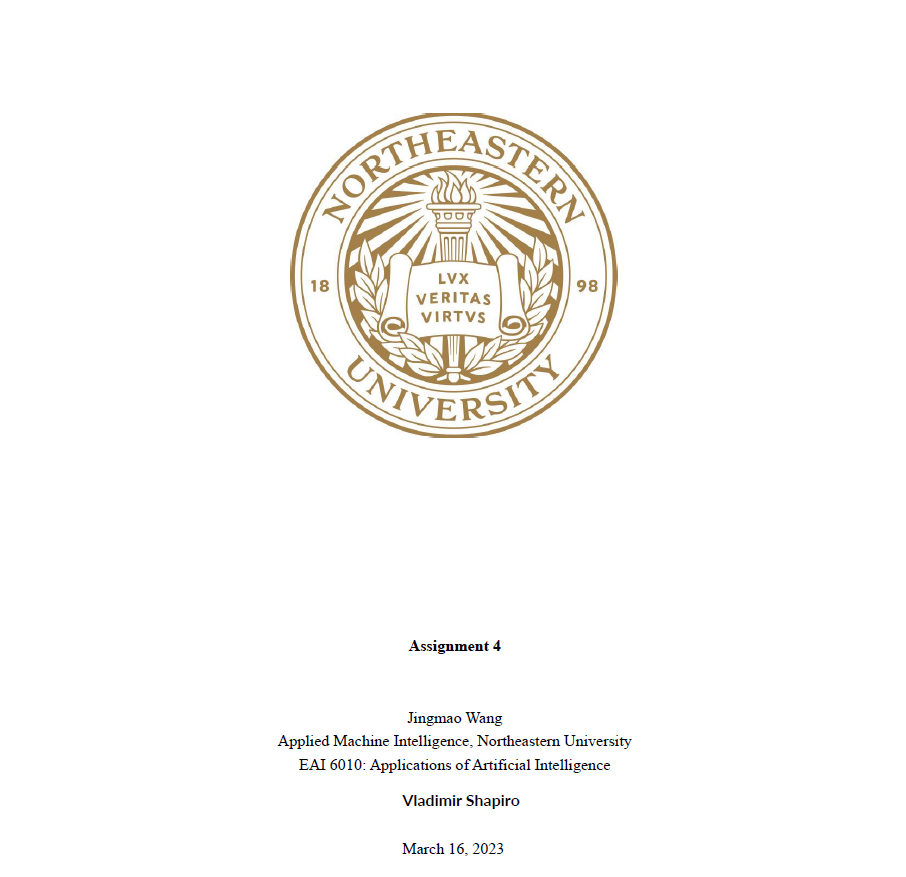

# Introduction


In Part1, we will explor digital image processing, including how to read an image from a URL and display it, Image Contours and Histograms, Grayscale, Transform and Histogram Equalization, Fourier Transform of Gray Images
In part2, we will use Convolutional Neural Network for MNIST Classification.

# Analysis
##**Part 1**.

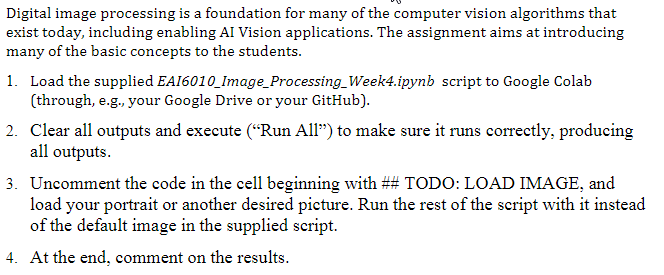

###**A1 -1  & A1 -2**
load the supplied file, clear all outputs and rerun. 

#**Introduction to Image Processing in Python**
An NCSU Libraries Workshop

Speaker: Nian Xiong

>This workshop provides an introduction to basic image processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python. Knowledge of image processing and Python programming is not required for this workshop, but will help.

*The source of this notebook is located at https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb*

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*








##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

In [ ]:
import numpy as np           # import library
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

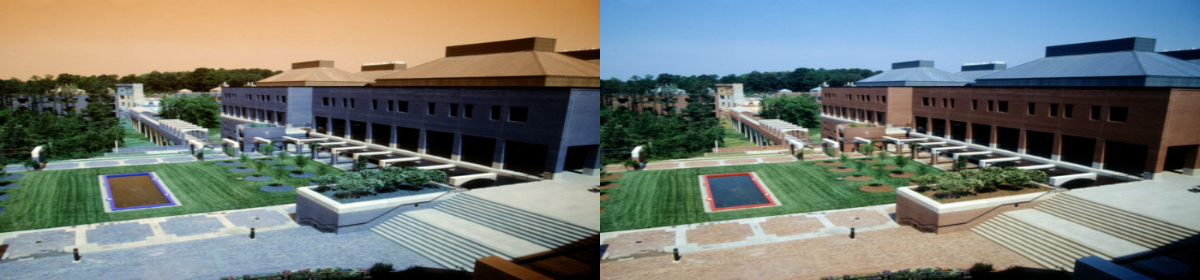

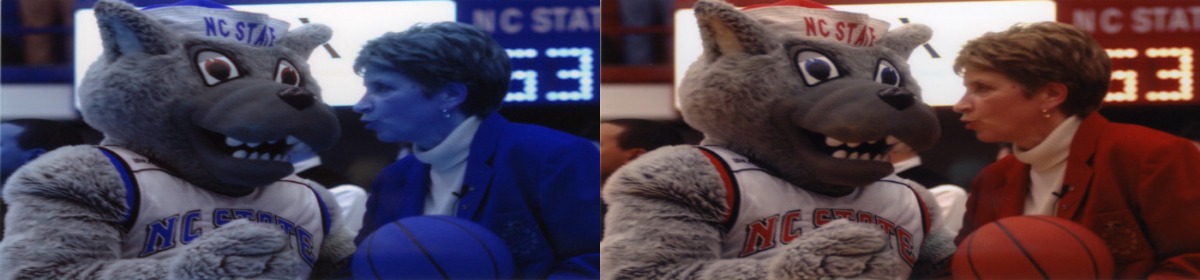

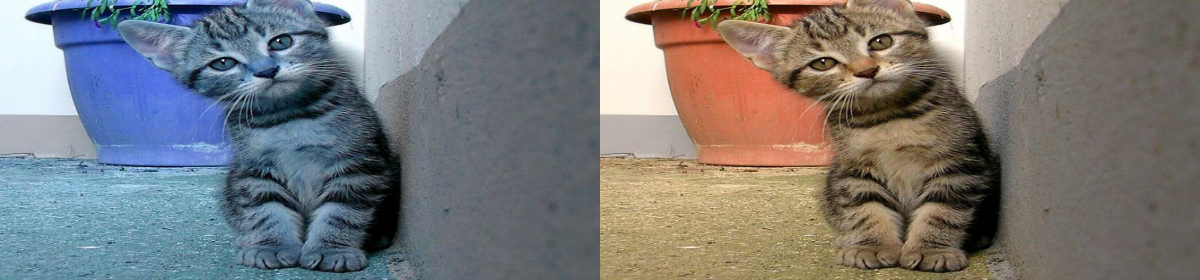



                                                                          Figure 1: BGR image and RGB image


In [ ]:
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/500,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/500,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:  # loop over the image URLs
  image = io.imread(url) #read the image from the current URL
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB) # convert the image from BGR format to RGB format 
  size = (600,280)# set new size
  resize_image = cv.resize(image, size)# convert
  resize_image_2 = cv.resize(image_2, size)# convert
  final_frame = cv.hconcat((resize_image, resize_image_2))# connect two image
  cv2_imshow(final_frame) #show
  print('\n')
print('                                                                          Figure 1: BGR image and RGB image')

In Figure 1, left picture is BGR image, right picture is RGB image

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

In [ ]:
## TODO: LOAD IMAGE
## url = 
## myImg = io.imread(url)  
## cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


##Step3: Image Contours and Histograms

check the image in detail.

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


the output is 'uint8', '571', '800', '3', it means that the image is in uint8 data type The height is 571 pixels, the width is 800 pixels, and the image has 3 channels, which suggests that the image is a color image with separate red, green, and blue channels.

### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

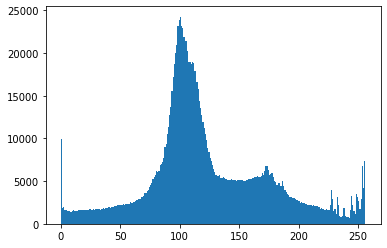

          Figure 2: the histogram of all the pixels 


In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) # creates a histogram, 'image.ravel()' flattens the image into a 1-dimensional array
plt.show() # show
print('          Figure 2: the histogram of all the pixels ')

Figure 2 is the histogram of all the pixels in the color image

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 100, which represents the white patch in the image

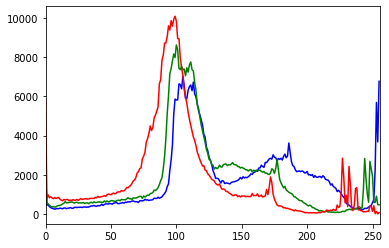

          Figure 3: color histograms of an image


In [ ]:
color = ('b','g','r')      # define color
for i,col in enumerate(color): # loop all color 
    histr = cv.calcHist([image],[i],None,[256],[0,256]) # calculate the histogram for the current color channel i of the input image
    plt.plot(histr,color = col) #plot the histogram for the current color channel 
    plt.xlim([0,256])# set the range of pixel values
plt.show()# show
print('          Figure 3: color histograms of an image')

Figure 3 describes the distribution of colors.

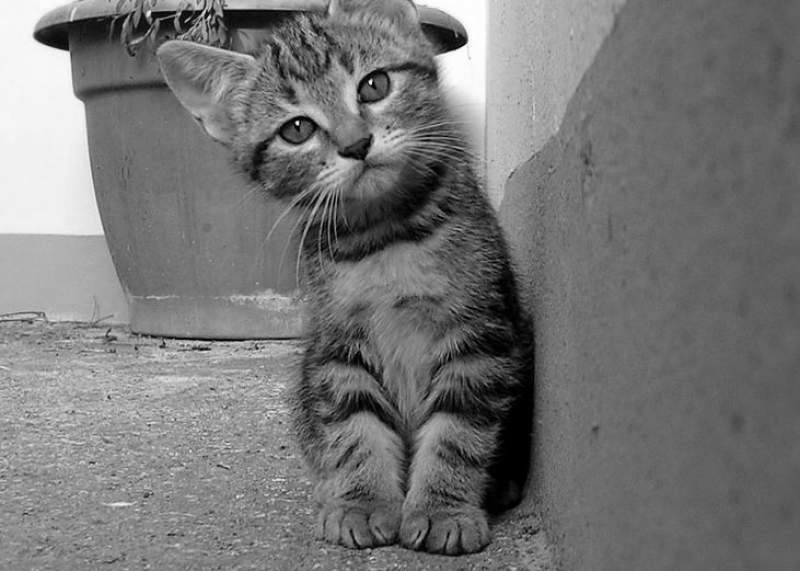

                                   Figure 4: Converted images


In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #convert BGR image to GRAY
cv2_imshow(gray_image)# show
print('                                   Figure 4: Converted images')

Figure 4 convert BGR image to Gray. Next we will plot the histogram of the gray image.

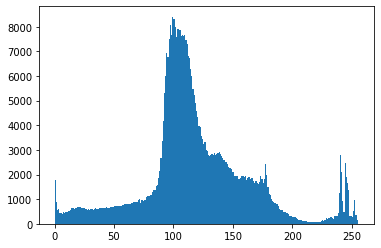

           Figure 5: histogram of the gray image


In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])# creates a histogram, 'image.ravel()' flattens the image into a 1-dimensional array
plt.show() # show
print('           Figure 5: histogram of the gray image')

In Figure 5, we can see the image hist has decreased ~ 1/3 of the histogram of color image

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


In [ ]:
#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

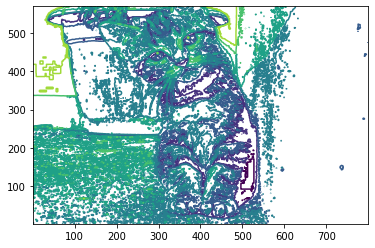

In [ ]:
plt.contour(gray_image, origin = "image")# use plt.contour() function finds image contour of the grayscale image

           Figure 6: contour of the grayscale image(matplotlib)

Figure 6 use matplotlib to find the contour of the grayscale image.

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

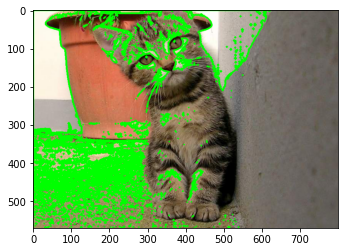

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # find contours
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

         Figure 7: contour of the grayscale image(openCV)

Figure 7 use openCV to find the contour of the grayscale image.

#### TODO # 3: Find the contour of your own image

In [ ]:
# Your code
# plt.contour()

Next, we will explor Grayscale Transform and Histogram Equalization

##Step4: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

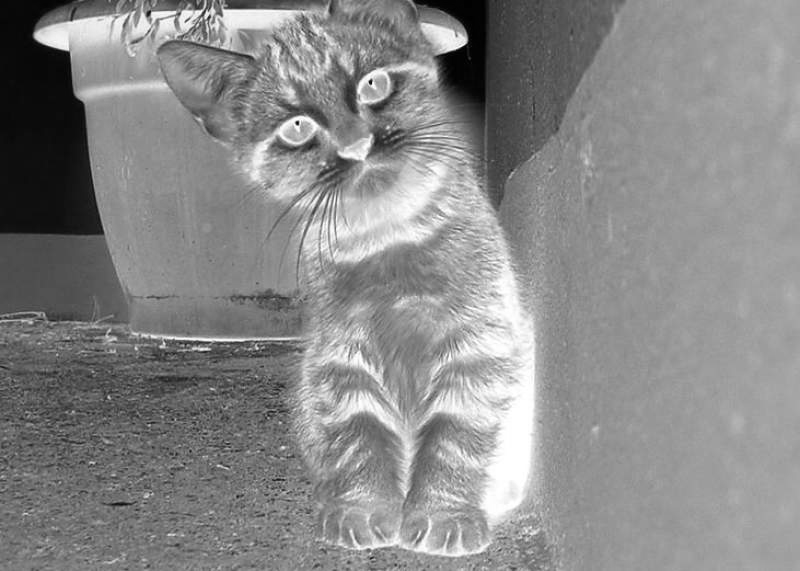

                                  Figure 8: inverse grayscale image


In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image #inverse operation
cv2_imshow(im2)# show
print('                                  Figure 8: inverse grayscale image')

Figure 8 is inverse grayscale image, you could see that the bright pixels become dark, and the dark pixels become bright

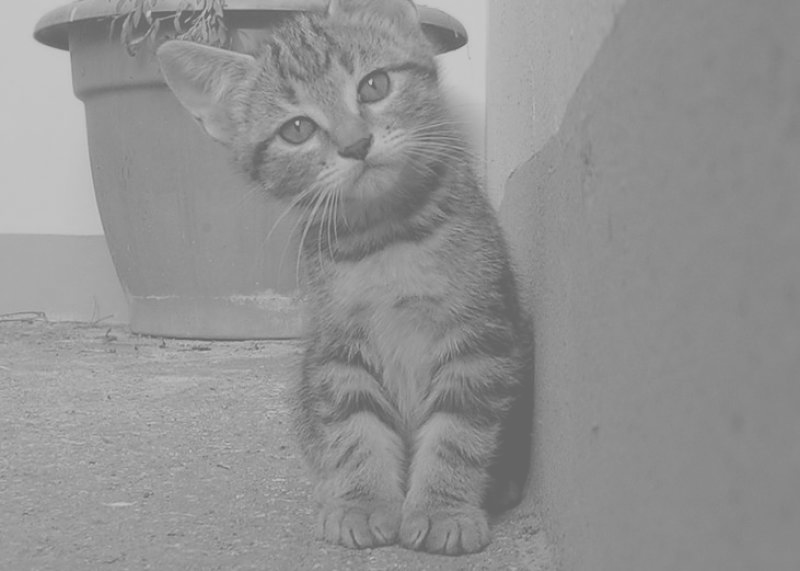

                                  Figure 9: Another transform of the image


In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100 # Another transform
cv2_imshow(im3)# show 
print('                                  Figure 9: Another transform of the image')

In Figure 9,  transformed the range of pixel values to 100-200, all the pixels become brighter and a hazing-like effect of the image is generated.

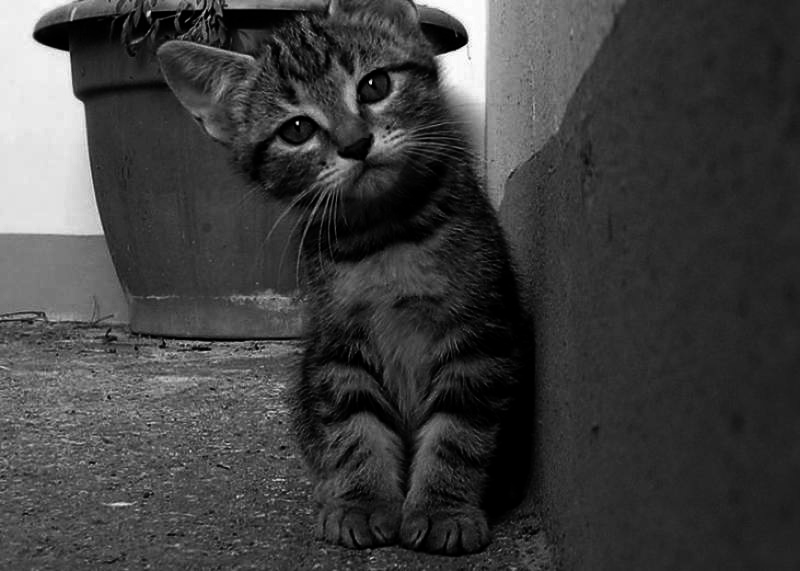

                                    Figure 10: Third conversion


In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2 # enhance the contrast
cv2_imshow(im4) # show
print('                                    Figure 10: Third conversion')

In Figure 10, we enhance the contrast in the image, brighter regions are brighter and darker regions are darker

#### TODO #4:  Try some mathematical operations on your image


In [ ]:
## Implement your code here
## myGrayImgTrans = myGrayImg...
## cv2_imshow(myGrayImgTrans)

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

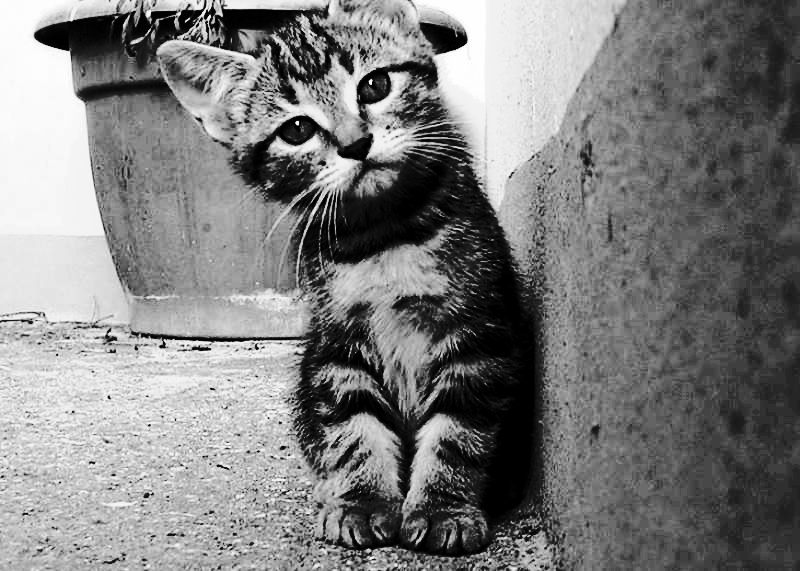

                                      Figure 11: equalized image


In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):# take image and number of bins
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256]) #compute the histogram of the input image
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)# mask any zero values in the CDF array, scaling the remaining values to a range of 0-255, and then filling in the masked values with 0:
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]# return image type is uint8 

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)# save
cv2_imshow(im5)# show
print('                                      Figure 11: equalized image')

Figure 11 demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. 

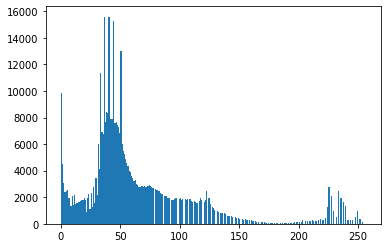

             Figure 12: histogram of the image4


In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256]) # create histogram
plt.show() # show 
print('             Figure 12: histogram of the image4')

Figure 12 is the histogram of the image4

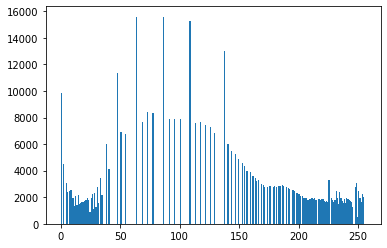

          Figure 13: the histogram of the image5


In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()
print('          Figure 13: the histogram of the image5')

Figure 13 is the histogram of the image after histogram equalization.

#### TODO # 5: Do a histogram equalization on your grayscale image



In [ ]:
## TODO: IMPLEMENT YOUR CODE HERE
## CODE INSTRUCTION
##plt.imshow()

##Step5: Fourier Transform of Gray Images
[FFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
> A fourier transform is used to find the frequency domian of an image. You can consider an image as a signal which is sampled in two directions. So taking a fourier transform in both X and Y directions gives you the frequency representation of image. For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

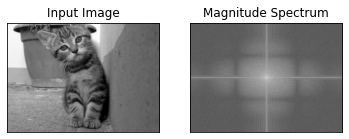

          (a)                        (b)
   Figure 14: input image and Magnitude Spectrum


In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))#  Guassian filter
# Transform the image to frequency domain
f = np.fft.fft2(imBlur) #transforms the blurred image to the frequency domain
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)# Bring the zero-frequency component to the center
magnitude_spectrum = 30*np.log(np.abs(fshift)) #calculate the magnitude spectrum

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray') # create figure
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
print('          (a)                        (b)')
print('   Figure 14: input image and Magnitude Spectrum')

Figure 14 (a) is the input image and (b) is corresponding Magnitude Spectrum.

### TODO # 6: Generate a fourier transform of your grayscale image

In [ ]:
# todo: Implement your code here


## Step6: Finding Edges by Highpass Filtering in FFT

This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

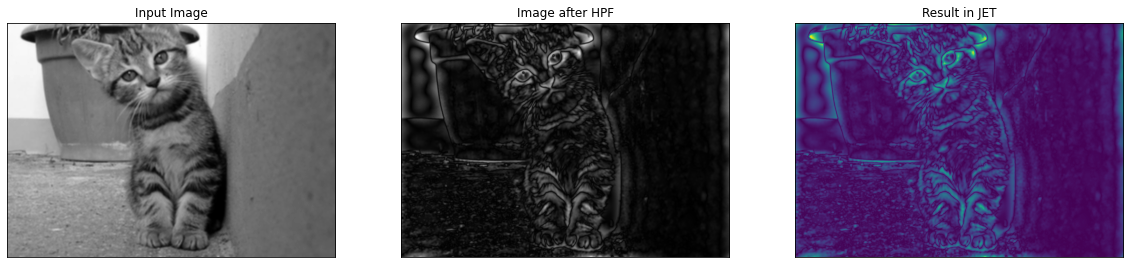

                      (a)                                                     (b)                                                       (c)
                                                             Figure 15:  demonstrate of high pass filter


In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2) # calculates the center pixel coordinates of the blurred image
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0 # remove low frequencies with a rectangle size of 10
f_ishift = np.fft.ifftshift(fshift) # inverse Fourier transform to the modified frequency domain
img_back = np.fft.ifft2(f_ishift) # Fourier transform
img_back = np.abs(img_back)  #takes the absolute value 

plt.figure(figsize=([20, 20])) # plot 
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()
print('                      (a)                                                     (b)                                                       (c)')
print('                                                             Figure 15:  demonstrate of high pass filter')                 

Figure 15(a)  is input image.        

Figure 15(b)  is the input image after removing low-frequency components.

Figure 15(c)  is the result which displays the color of the filtered image.

### **A1 -3**

#### TODO #1: Read an image from a URL and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

First, load an image

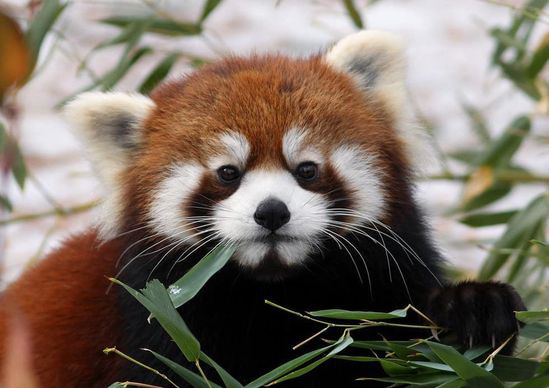

                         Figure 16: Ailurus fulgens


In [ ]:
## TODO: LOAD IMAGE

url = 'https://i.pinimg.com/550x/67/d3/e2/67d3e2882722dd454161815b9fb56c6a.jpg' 
myImg = io.imread(url)  #read picture
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB)) # convert BFR to RGB
print('                         Figure 16: Ailurus fulgens')

Figure 16 is my favorite animal, next we will check the detail of this picture

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(myImg.dtype)
# Check the height of image 
print(myImg.shape[0])
# Check the width of image 
print(myImg.shape[1])
# Check the number of channels of the image
print(myImg.shape[2])

uint8
388
549
3


the output is 'uint8', '388', '549', '3', it means that the image is in uint8 data type The height is 388 pixels, the width is 549 pixels, and the image has 3 channels, which suggests that the image is a color image with separate red, green, and blue channels.

 #### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


Display the histogram of all the pixels in the color image

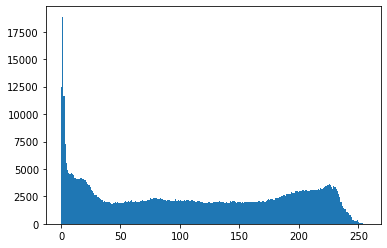

            Figure 17: the histogram of color image 


In [ ]:
plt.hist(myImg.ravel(),bins = 256, range = [0,256]) # create histogram
plt.show()
print('            Figure 17: the histogram of color image ')

 Figure 17 is the histogram of all the pixels in the color image.

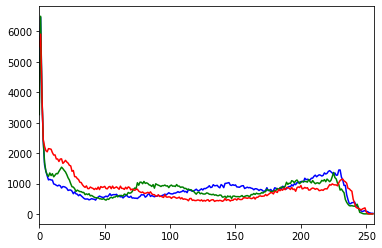

          Figure 18: color histograms of an image


In [ ]:
color = ('b','g','r')      # define color
for i,col in enumerate(color): # loop all color 
    histr = cv.calcHist([myImg],[i],None,[256],[0,256]) # calculate the histogram for the current color channel i of the input image
    plt.plot(histr,color = col) #plot the histogram for the current color channel 
    plt.xlim([0,256])# set the range of pixel values
plt.show()# show
print('          Figure 18: color histograms of an image')

Figure 18 describes the distribution of colors.

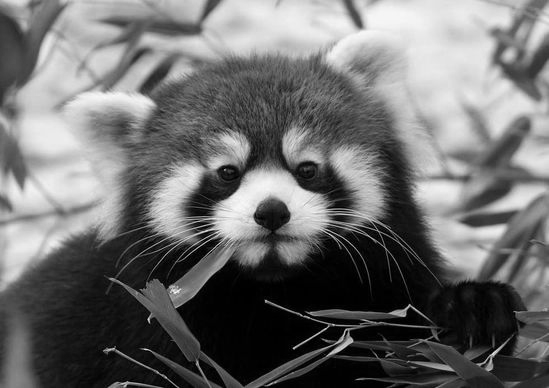

                               Figure 19: GRAY image


In [ ]:
myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)# convert BFR to GRAY
cv2_imshow(myGrayImg) # show
print('                               Figure 19: GRAY image')

Figure 19 is Gray image of Figure 16

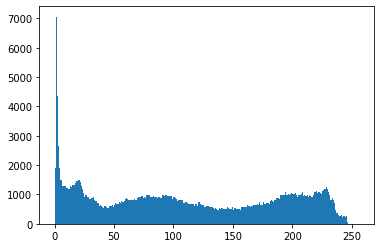

         Figure 20: the histogram of the gray image


In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(myGrayImg.ravel(),bins = 256, range = [0, 256])# the histogram of the gray image
plt.show()
print('         Figure 20: the histogram of the gray image')

 Figure 20 is the the histogram of the gray image,
 the gray image hist has decreased 1/3 of the histogram of color image

#### TODO # 3: Find the contour of your own image

Next, we will use two method to find the contour of my own image 

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

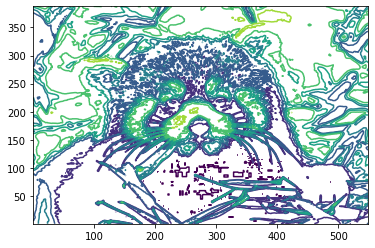

In [ ]:
plt.contour(myGrayImg, origin = "image") #use matplotlib to find countour 

       Figure 21: contour of the grayscale image(matplotlib) 

Figure 21 use matplotlib to find the contour of the grayscale image.

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

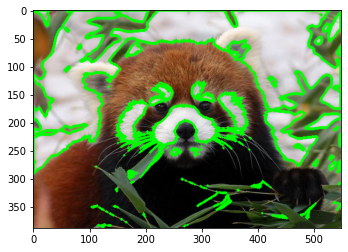

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(myGrayImg,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # find contours
cv.drawContours(myImg, contours, -1, (0, 255, 0), 3)
plt.imshow(myImg)

         Figure 22: contour of the grayscale image(openCV)


Figure 22 use openCV to find the contour of the grayscale image.

##Step4: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

#### TODO #4:  Try some mathematical operations on your image


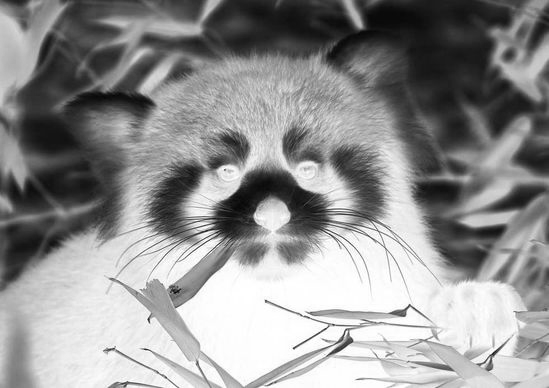

                    Figure 23: inverse grayscale image


In [ ]:
myGrayImgTrans = 255 - myGrayImg #inverse operation
cv2_imshow(myGrayImgTrans)
print('                    Figure 23: inverse grayscale image')

This is an inverse operation of the grayscale image, you could see that the bright pixels become dark, and the dark pixels become bright

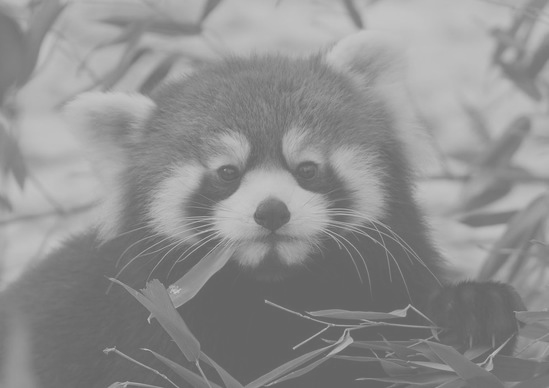

                    Figure 24: Another transform of the gray image


In [ ]:
myGrayImgTrans1 = (100.0/255)*myGrayImg + 100 # Another transform
cv2_imshow(myGrayImgTrans1)# show 
print('                    Figure 24: Another transform of the gray image')

In Figure 24, transformed the range of pixel values to 100-200, all the pixels become brighter and a hazing-like effect of the image is generated.

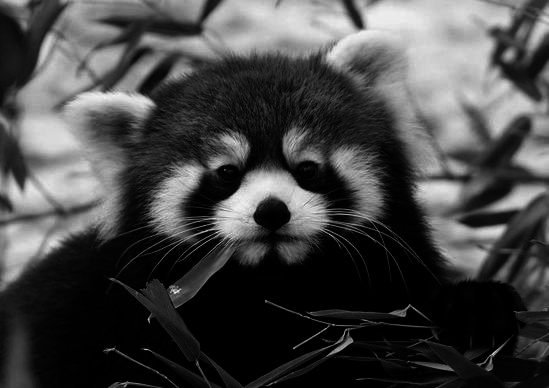

                           Figure 25: Third conversion


In [ ]:
# The lightness level of the gray_image decreases after this step
myGrayImgTrans2 = 255.0*(myGrayImg/255.0)**2 # enhance the contrast
cv2_imshow(myGrayImgTrans2) # show
print('                           Figure 25: Third conversion')

#### TODO # 5: Do a histogram equalization on your grayscale image



we will do a histogram equalization on my grayscale image

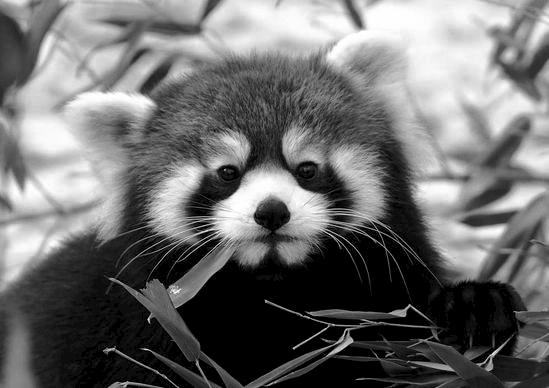

                        Figure 26: equalized image


In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):# take image and number of bins
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256]) #compute the histogram of the input image
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)# mask any zero values in the CDF array, scaling the remaining values to a range of 0-255, and then filling in the masked values with 0:
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]# return image type is uint8 

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
myGrayImg_1 = histeq(myGrayImgTrans2)# save
cv2_imshow(myGrayImg_1)# show
print('                        Figure 26: equalized image')
## CODE INSTRUCTION
##plt.imshow()

Figure 26 demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible.

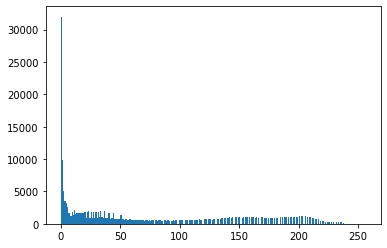

            Figure 27: histogram of the image


In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(myGrayImgTrans2.ravel(),bins = 256, range = [0, 256]) # create histogram
plt.show() # show 
print('            Figure 27: histogram of the image')

   Figure 27 is the histogram of the image(Figure25)

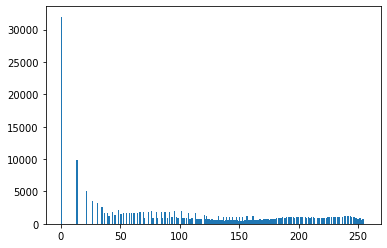

          Figure 28: the histogram of the image 


In [ ]:
# After histogram equalization
plt.hist(myGrayImg_1.ravel(),bins = 256, range = [0, 256])
plt.show()
print('          Figure 28: the histogram of the image ')

Figure 28 is the histogram of the myGrayImg_1(Figure26) after histogram equalization.

### TODO # 6: Generate a fourier transform of your grayscale image

we will explor fourier transform.

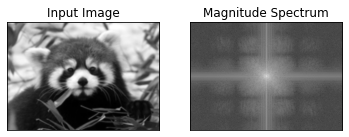

          (a)                        (b)
   Figure 29: input image and Magnitude Spectrum


In [ ]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur_1 = cv.blur(myGrayImg,(5,5))#  Guassian filter
# Transform the image to frequency domain
f_1 = np.fft.fft2(imBlur_1) #transforms the blurred image to the frequency domain
# Bring the zero-frequency component to the center
fshift_1 = np.fft.fftshift(f_1)# Bring the zero-frequency component to the center
magnitude_spectrum_1 = 30*np.log(np.abs(fshift_1)) #calculate the magnitude spectrum

plt.subplot(121),plt.imshow(imBlur_1, cmap = 'gray') # create figure
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_1, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
print('          (a)                        (b)')
print('   Figure 29: input image and Magnitude Spectrum')


Figure 29 (a) is the input image and (b) is corresponding Magnitude Spectrum.

## Step6: Finding Edges by Highpass Filtering in FFT

This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges

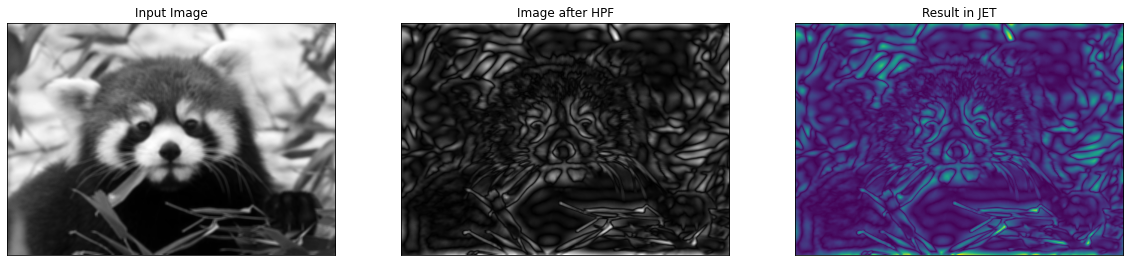

                      (a)                                                     (b)                                                       (c)
                                                             Figure 30:  demonstrate of high pass filter


In [ ]:
rows, cols = imBlur_1.shape
crow,ccol = round(rows/2) , round(cols/2) # calculates the center pixel coordinates of the blurred image
# remove low frequencies with a rectangle size of 10
fshift_1[crow-10:crow+10, ccol-10:ccol+10] = 0 # remove low frequencies with a rectangle size of 10
f_ishift_1 = np.fft.ifftshift(fshift_1)  # inverse Fourier transform to the modified frequency domain
img_back_1 = np.fft.ifft2(f_ishift_1)  # Fourier transform
img_back_1 = np.abs(img_back_1)  #takes the absolute value

plt.figure(figsize=([20, 20]))  # plot 
plt.subplot(131),plt.imshow(imBlur_1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back_1, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back_1)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()
print('                      (a)                                                     (b)                                                       (c)')
print('                                                             Figure 30:  demonstrate of high pass filter')                 

Figure 30(a) is input image.

Figure 30(b) is the input image after removing low-frequency components.

Figure 30(c) is the result which displays the color of the filtered image.

### **A1 -4**

The Figure 30(a) shows the original input image, which is typically a blurred or noisy image.

The Figure 30(b) shows the result of applying high-pass filtering to the input image using FFT. High-pass filtering removes low-frequency information from the image, which can reduce the blurriness or noise in the image and sharpen its edges.

The Figure 30(c) is the same as the second image, but shown in the JET colormap. The JET colormap is a commonly used colormap for visualizing data, where low values are blue, intermediate values are green and yellow, and high values are red.

##**Part 2**.

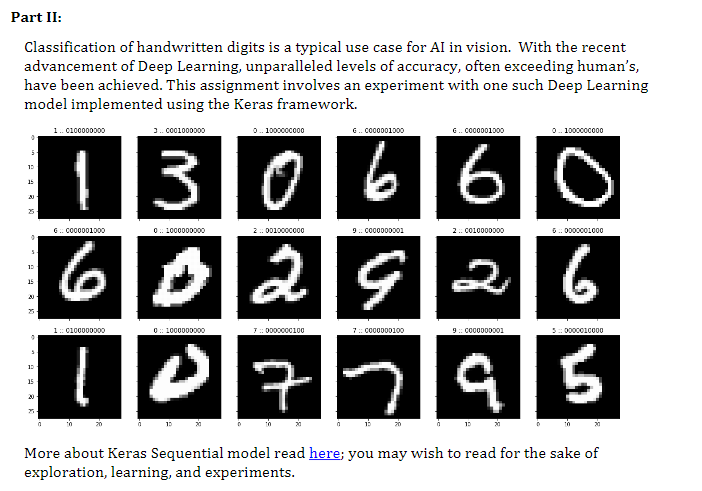

1. Load the supplied EAI6010_DL_MNIST_classification_Week4.ipynb script to Google
Colab (from, e.g., your Google Drive or your GitHub).

2. Training on a conventional CPU may be slower than on GPU/TPU. To request that in Colab
go to Runtime −> Change Runtime Type and select GPU from the dropdown list before
running the script:

3. After making predictions and calculate accuracy metrics.

4. Change the number of training epochs, get new results including new accuracy, and
visualize and reflect on the results with the original number of epochs. Report whether
the results improved or not in your opinion.

5. Explore alternatives to the default model parameters, such as loss, optimizer, and
metrics. Experiment with the alternatives, visualize and report results, and interpret
them, including the motivation behind parameter selection. Report whether the results
improved or not in your opinion.

6. Bonus task: experiment with the hyperparameters of the model and/or the
architecture of the CNN, make predictions, and visualize, report, and interpret the
results of the experiments. Make sure to change only one parameter at a time. Report
whether the results improved or not in your opinion.

### **A2 -1 & A2 -2**

load supplied file. First we use GPU to accelerate

In [ ]:
import tensorflow as tf
print("GPU available: ", tf.test.is_gpu_available()) # check whether we use GPU to accelerate

GPU available:  True


# MNIST Classification Using *Convolutional Neural Network*
---
- Author: Vladimir Shapiro, adopted from Diego Inácio's
- Notebook: [MNIST_classification.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Experiments/MNIST_classification.ipynb)
---
Digit classification using *Convolutional Neural Network*.

In [ ]:
%matplotlib inline        
import matplotlib         # import libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


## Read the dataset
---

In [ ]:
mnist = tf.keras.datasets.mnist       # load datasets
[X_train, Y_train],[X_test, Y_test] = mnist.load_data()  # return two tuples, one for the training set and one for the test set
X_train = X_train[..., None]
X_test = X_test[..., None]

# one hot for multi-class classification
# MNIST = 10 classes [0-9]
Y_train_oh = np.zeros((Y_train.size, 10))    # converted to one-hot encoding
Y_train_oh[np.arange(Y_train.size), Y_train] = 1
Y_test_oh = np.zeros((Y_test.size, 10))
Y_test_oh[np.arange(Y_test.size), Y_test] = 1

print('X_train:', X_train.shape) # print shape
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
Y_test: (10000,)
Y_test_oh: (10000, 10)


Display several randomly selected handwritten digits to provide a raw impression how the digits look like.

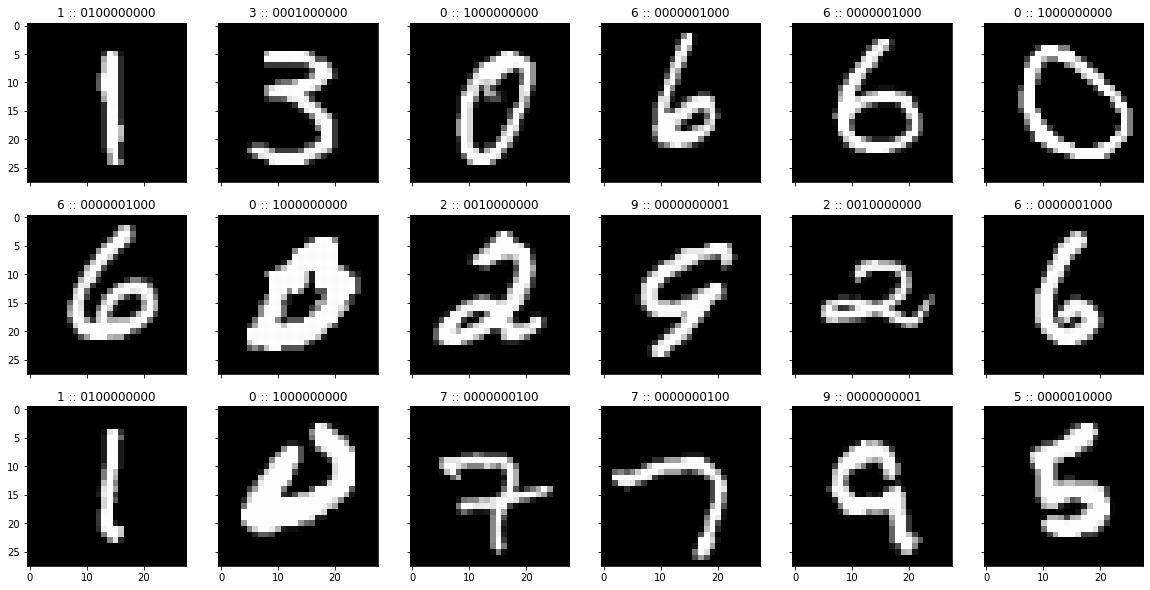

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10) #set the size of the plot.
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)# create a 3 by 6 grid of subplots, where each subplot corresponds to an image and its label.

np.random.seed(1234) #sets the random seed.
for ax in AX.ravel(): #loop over each subplot
    rindex = np.random.randint(Y_train.size) # selects a random image from the training set
    img_show = X_train[rindex][...,0] # show
    ax.imshow(img_show, cmap='gray') # show in gray
    # title label + one-hot
    title = f'{Y_train[rindex]} :: ' #set title label
    title += ''.join([str(int(e)) for e in Y_train_oh[rindex]]) 
    ax.set_title(title)
plt.grid(False) # remove the grid lines from the plot.

                                 Figure 1: several randomly handwritten digits

Figure 1 displays several randomly selected handwritten digits to provide a raw impression how the digits look like.

## Transform dataset
---

To a format suitable for the training and predictions later on. A separate *X_test* dataset is allocated.

In [ ]:
# Change dtype to float32
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Change axes and normalization
X_train, Y_train = X_train/255, Y_train.reshape(-1, 1)
X_test, Y_test = X_test/255, Y_test.reshape(-1, 1)

# reshape Xs
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)

print('X_train:', X_train.shape) # print shape
print('x_train:', x_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('x_test:', x_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
x_train: (60000, 784)
Y_train: (60000, 1)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
x_test: (10000, 784)
Y_test: (10000, 1)
Y_test_oh: (10000, 10)


# Classification using *Convolutional Neural Network (CNN)*
---

## Training

Create Keras' Sequential CNN model, which is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

First, define the *structure* or *architecture* of the CNN model:

In [ ]:
# Get dimensions
N1, N2, C = X_train[0].shape

# Model
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'), #A 2D convolutional layer with 32 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.Conv2D(64, 3, activation='relu'),#A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.MaxPooling2D(pool_size=2),# A max pooling layer with a pool size of 2x2.
    tf.keras.layers.Dropout(0.25), #A dropout layer that randomly sets 25% of the input units to 0 at each update during training.
    tf.keras.layers.Flatten(),#A flatten layer that flattens the output of the previous layer into a 1D tensor.
    tf.keras.layers.Dense(N1*N2, activation='relu'), #A dense layer with N1*N2 neurons and a ReLU activation function.
    tf.keras.layers.Dropout(0.5),#Another dropout layer that randomly sets 50% of the input units to 0 at each update during training.
    tf.keras.layers.Dense(10, activation='softmax') #A dense layer with 10 neurons and a softmax activation function.
])

modelCNN.summary() # Display the structure

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 784)               7226128   
                                                      

Now, *build* the actual model, that is allocate computer memory, connections, hyperparameters, etc. per definitions above.

In [ ]:
modelCNN.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
NUMBER_OF_EPOCHS = 10             #set number of epoch
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS) # train

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1256 - accuracy: 0.9610
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0496 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0116 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

## Testing

Now, we have the trained model and can do predictions.

313/313 [==============================] - 1s 2ms/step


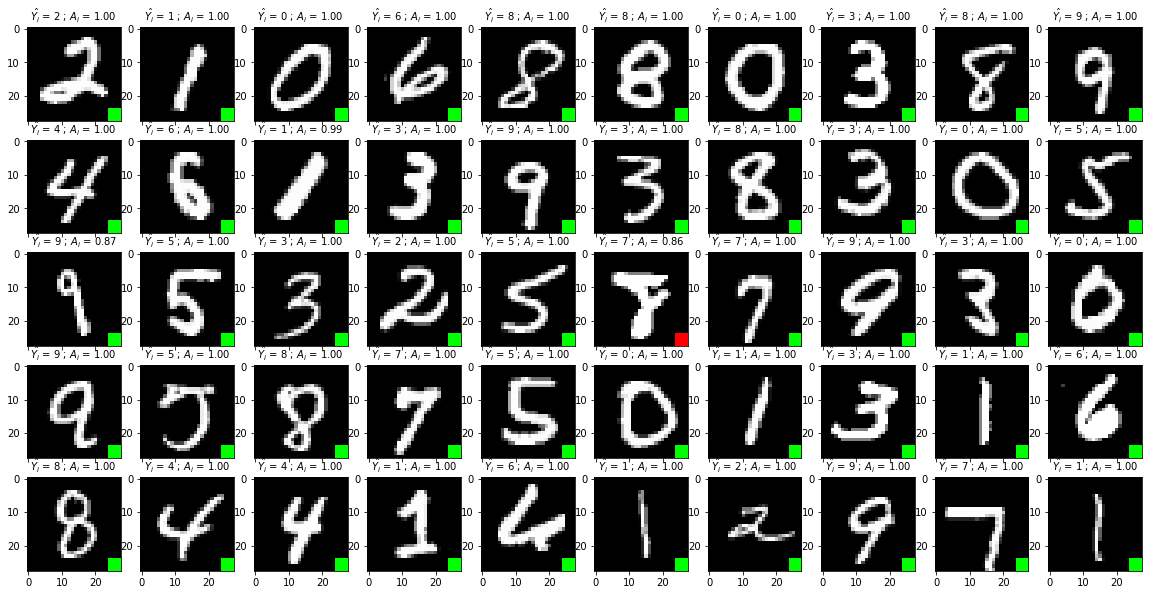

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True) #Create a figure with 5 rows and 10 columns of subplots to show the images and their predicted labels
AX = [b for a in AX for b in a] # Flatten the list of subplots AX

prediction_on_test = modelCNN.predict(X_test) #predict 

np.random.seed(1234) #Set the random seed.
for ax in AX: #Loop through each subplot in AX
    index = np.random.randint(Y_test.size) #Generate a random index to select a sample from the test set.
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3)) # Create a 3-channel image array with dimensions (N1, N2, 3)
    img_show *= X_test[index] # original image
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:  # If the predicted label is correct, set the bottom right corner of the image to green; otherwise, set it to red.
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show) # Show the image in the current subplot.
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10) #Set the title

                                         Figure 2: the prediction result

Figure 2 displays the prediction result, green means correct, and red means False

Calculate a validation metric as:

In [ ]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.013179204928727239
1875/1875 [==============================] - 4s 2ms/step
Train: 0.000993157104943222


A low MSE on the test dataset (0.0131) indicates that the model is generalizing well and making accurate predictions on new, unseen data.
A low MSE on the train dataset (0.00099) indicates that the model is fitting the training data very well, but it may be overfitting to the training data and not generalizing well to new data.

### **A2 -3 & A2 -4**

Now, we have already made predictions and calculated accuracy metrics.

In [ ]:
modelCNN.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

we change epoch as 20 and train

In [ ]:
modelCNN.fit(X_train, Y_train_oh, epochs=20) # train

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0124 - accuracy: 0.9966
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0095 - accuracy: 0.9970
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0078 - accuracy: 0.9977
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0076 - accuracy: 0.9975
Epoch 8/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

get new result and accuracy

313/313 [==============================] - 1s 4ms/step


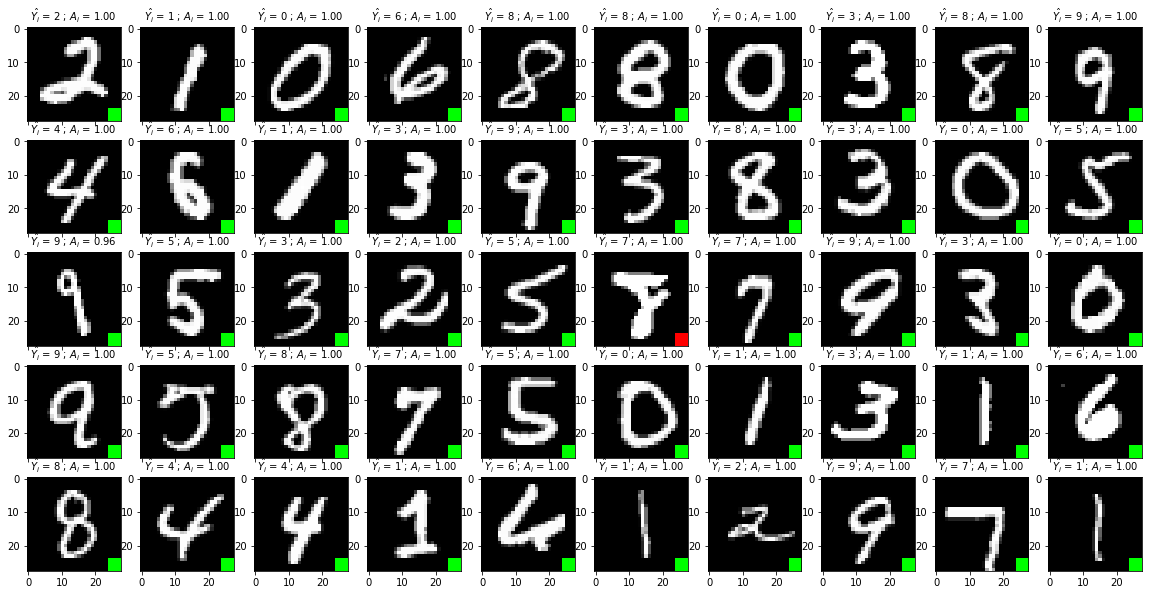

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True) #Create a figure with 5 rows and 10 columns of subplots to show the images and their predicted labels
AX = [b for a in AX for b in a] # Flatten the list of subplots AX

prediction_on_test = modelCNN.predict(X_test) #predict 

np.random.seed(1234) #Set the random seed.
for ax in AX: #Loop through each subplot in AX
    index = np.random.randint(Y_test.size) #Generate a random index to select a sample from the test set.
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3)) # Create a 3-channel image array with dimensions (N1, N2, 3)
    img_show *= X_test[index] # original image
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:  # If the predicted label is correct, set the bottom right corner of the image to green; otherwise, set it to red.
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show) # Show the image in the current subplot.
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10) #Set the title

                                        Figure 3: the new prediction result

Figure 3 is the new prediction result.

In [ ]:
print('Validation')
prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 2ms/step
Test: 0.012670516254328815
1875/1875 [==============================] - 4s 2ms/step
Train: 6.368775413227616e-05


After training the model for 20 epochs, the mean squared error (MSE) between the predicted labels and the actual labels is 0.012 for the test dataset and 0.000063 for the training dataset.

In [ ]:
#history_10 = modelCNN.fit(X_train, Y_train_oh, epochs=10, validation_data=(X_test, Y_test_oh))
#history_20 = modelCNN.fit(X_train, Y_train_oh, epochs=20, validation_data=(X_test, Y_test_oh))

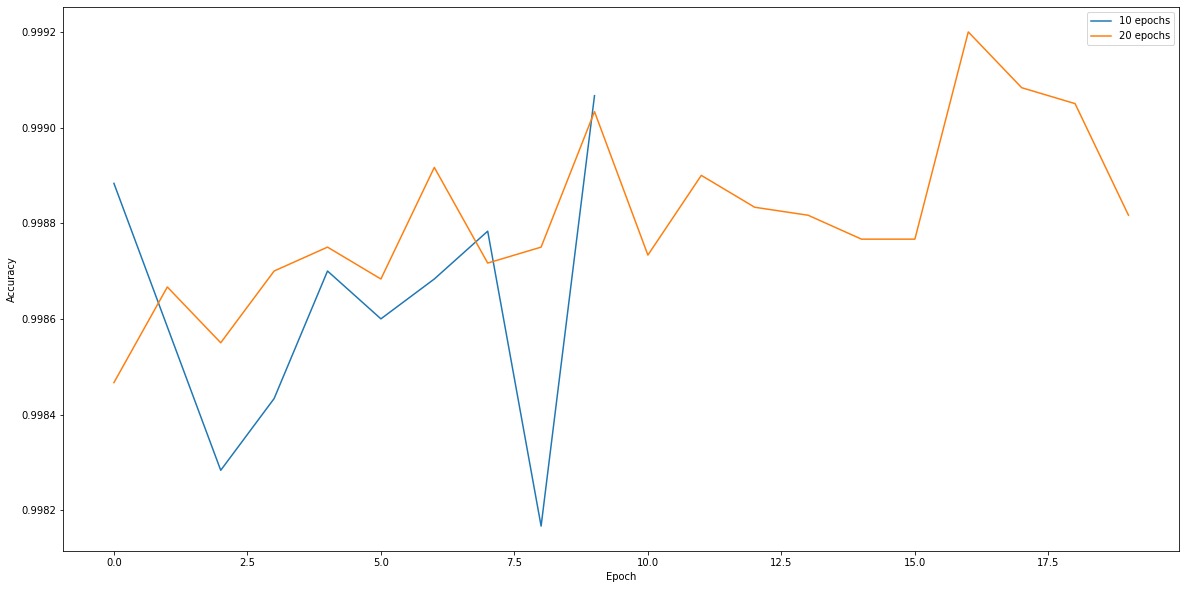

                                                                Figure 4: Accuracy with epochs as 10 and 20


In [ ]:
# Plot accuracy for 10 and 20 epochs
plt.plot(history_10.history['accuracy'], label='10 epochs')
plt.plot(history_20.history['accuracy'], label='20 epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('                                                                Figure 4: Accuracy with epochs as 10 and 20')

Figure 4 is the accuracy with epochs as 10 and 20.
Based on the line chart solely, 20 epochs indicate higher accuracy across all epochs compared to 10 epochs. However, the performance of 20 epochs is better in training dataset than in the test dataset(MSE difference is larger in 20 epochs than in 10 epochs), which causes overfitting. Therefore, 10 epochs is still the better choice. 


### **A2 -5**

SGD (Stochastic Gradient Descent) is a simple and widely used optimization algorithm. It updates the model's weights by computing the gradient of the loss function with respect to each weight and then moving the weight in the opposite direction of the gradient. The learning rate determines the step size at each iteration. so we change optimizer and explor again

In [ ]:
modelCNN.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(), # change adma to sgd
    metrics=['accuracy']
)

In [ ]:
NUMBER_OF_EPOCHS = 10
history3 = modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

313/313 [==============================] - 1s 3ms/step


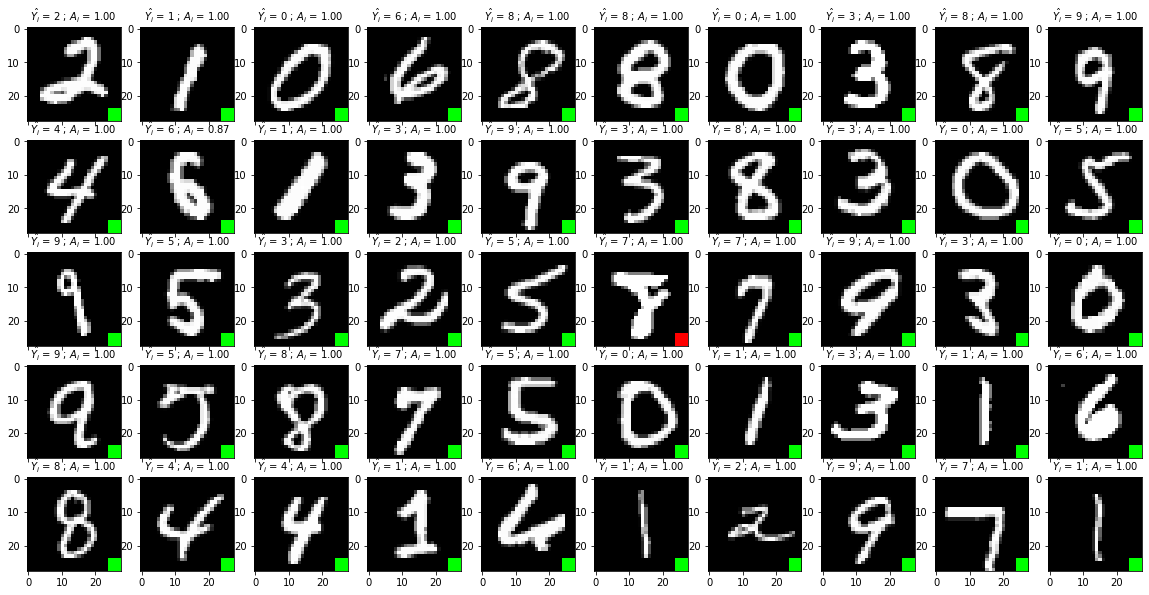

In [ ]:
fig, AX = plt.subplots(5, 10, sharex=True) #Create a figure with 5 rows and 10 columns of subplots to show the images and their predicted labels
AX = [b for a in AX for b in a] # Flatten the list of subplots AX

prediction_on_test = modelCNN.predict(X_test) #predict 

np.random.seed(1234) #Set the random seed.
for ax in AX: #Loop through each subplot in AX
    index = np.random.randint(Y_test.size) #Generate a random index to select a sample from the test set.
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3)) # Create a 3-channel image array with dimensions (N1, N2, 3)
    img_show *= X_test[index] # original image
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:  # If the predicted label is correct, set the bottom right corner of the image to green; otherwise, set it to red.
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show) # Show the image in the current subplot.
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10) #Set the title

                                 Figure 5: the  prediction result

Figure 5 is the result of new model.

In [ ]:
print('Validation')
prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 3ms/step
Test: 0.013735999134687597
1875/1875 [==============================] - 4s 2ms/step
Train: 9.806710579178066e-11


we can see the large difference in test  set and train set.

compare two model(optimizer = SGD and optimizer = adam)

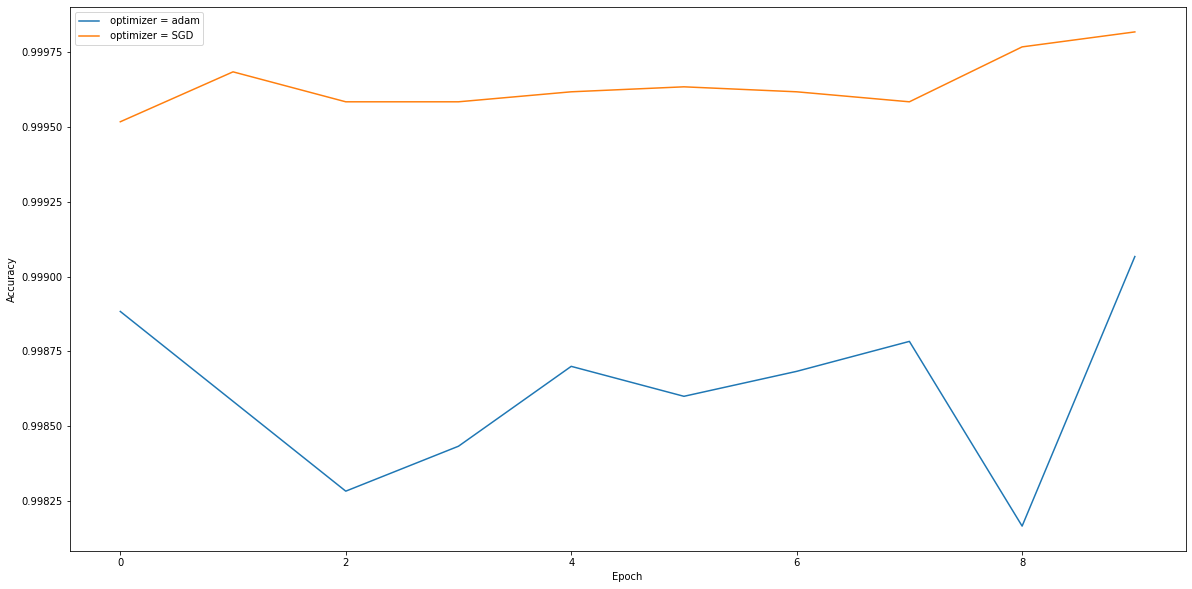

                                                                Figure 6: Accuracy with different optimizer


In [ ]:
plt.plot(history_10.history['accuracy'], label=' optimizer = adam')
plt.plot(history3.history['accuracy'], label=' optimizer = SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('                                                                Figure 6: Accuracy with different optimizer')

Figure 6 is accuracy with different optimizer, the accuracy of model which optermizer = SGD is higher than optermizer = adam. However, the performance of optermizer = SGD is better in training dataset than in the test dataset(MSE difference is larger in SGD than in adam), which causes overfitting. 

Therefore, optermizer = adam is still the better choice.


### **A2 -6 Bonus task**

In [ ]:
modelCNN_original = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'), #A 2D convolutional layer with 32 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.Conv2D(64, 3, activation='relu'),#A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.MaxPooling2D(pool_size=2),# A max pooling layer with a pool size of 2x2.
    tf.keras.layers.Dropout(0.25), #A dropout layer that randomly sets 25% of the input units to 0 at each update during training.
    tf.keras.layers.Flatten(),#A flatten layer that flattens the output of the previous layer into a 1D tensor.
    tf.keras.layers.Dense(N1*N2, activation='relu'), #A dense layer with N1*N2 neurons and a ReLU activation function.
    tf.keras.layers.Dropout(0.5),#Another dropout layer that randomly sets 50% of the input units to 0 at each update during training.
    tf.keras.layers.Dense(10, activation='softmax') #A dense layer with 10 neurons and a softmax activation function.
])
modelCNN_original.summary() # Display the structure

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_15 (Flatten)        (None, 9216)              0         
                                                                 
 dense_30 (Dense)            (None, 784)               7226128   
                                                     

In [ ]:
modelCNN_original.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
original = modelCNN_original.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1258 - accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0512 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0279 - accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0175 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

Above is Original model, first we will change the number of filters in the Conv2D layers.

In [ ]:
modelCNN_1 = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(64, 3, activation='relu'), #A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.Conv2D(64, 3, activation='relu'),#A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.MaxPooling2D(pool_size=2),# A max pooling layer with a pool size of 2x2.
    tf.keras.layers.Dropout(0.25), #A dropout layer that randomly sets 25% of the input units to 0 at each update during training.
    tf.keras.layers.Flatten(),#A flatten layer that flattens the output of the previous layer into a 1D tensor.
    tf.keras.layers.Dense(N1*N2, activation='relu'), #A dense layer with N1*N2 neurons and a ReLU activation function.
    tf.keras.layers.Dropout(0.5),#Another dropout layer that randomly sets 50% of the input units to 0 at each update during training.
    tf.keras.layers.Dense(10, activation='softmax') #A dense layer with 10 neurons and a softmax activation function.
])

modelCNN_1.summary() # Display the structure

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_17 (Flatten)        (None, 9216)              0         
                                                                 
 dense_34 (Dense)            (None, 784)               7226128   
                                                     

In [ ]:
modelCNN_1.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Next train and prediction

In [ ]:
NUMBER_OF_EPOCHS = 10
history4 = modelCNN_1.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1218 - accuracy: 0.9615
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0357 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0153 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
print('Validation')
prediction_on_test = modelCNN_1.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN_1.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 2ms/step
Test: 0.013592380585081111
1875/1875 [==============================] - 4s 2ms/step
Train: 0.0008535024305107103


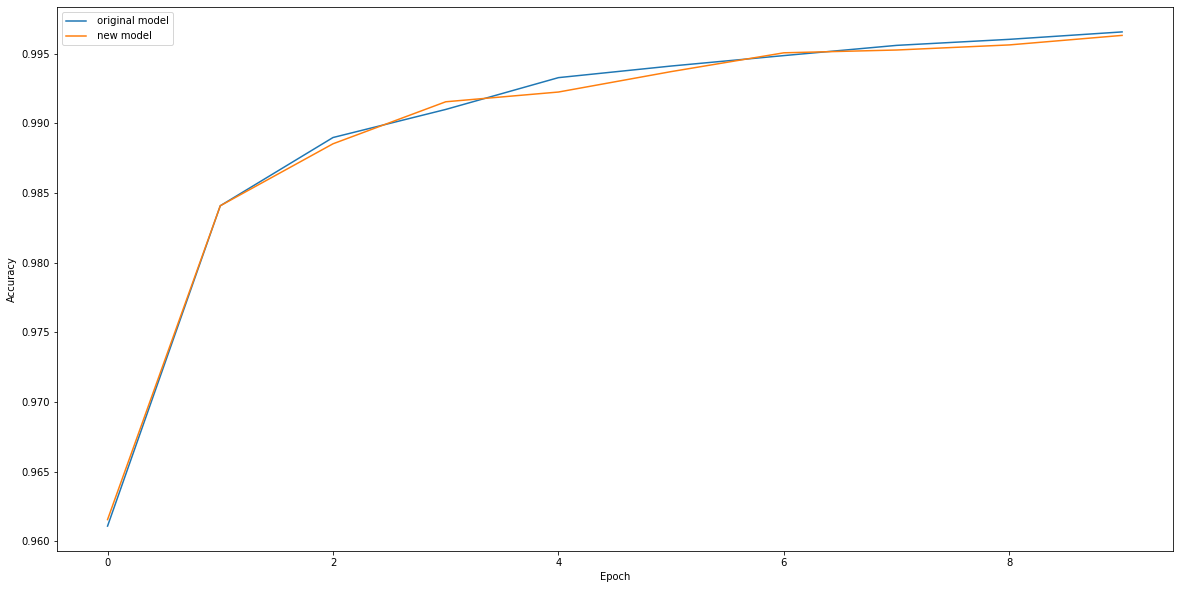

                                                                Figure 7: Accuracy with different model


In [ ]:
plt.plot(original.history['accuracy'], label=' original model')
plt.plot(history4.history['accuracy'], label=' new model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('                                                                Figure 7: Accuracy with different model')

Figure 7 is accuracy with different model, the accuracy of new model is lower than original model. When I change the number of filters in the Conv2D layer from 32 to 64, the number of learnable parameters in the network is increasing . This means that the model has more capacity to learn complex representations of the data, but it also increases the risk of overfitting to the training data.In this example, maybe occurs overfitting.


Next, we change activation as LeakyReLU.


In [ ]:
modelCNN_2 = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='LeakyReLU'), #A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.Conv2D(64, 3, activation='relu'),#A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.MaxPooling2D(pool_size=2),# A max pooling layer with a pool size of 2x2.
    tf.keras.layers.Dropout(0.25), #A dropout layer that randomly sets 25% of the input units to 0 at each update during training.
    tf.keras.layers.Flatten(),#A flatten layer that flattens the output of the previous layer into a 1D tensor.
    tf.keras.layers.Dense(N1*N2, activation='relu'), #A dense layer with N1*N2 neurons and a ReLU activation function.
    tf.keras.layers.Dropout(0.5),#Another dropout layer that randomly sets 50% of the input units to 0 at each update during training.
    tf.keras.layers.Dense(10, activation='softmax') #A dense layer with 10 neurons and a softmax activation function.
])

modelCNN_2.summary() # Display the structure

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_21 (Flatten)        (None, 9216)              0         
                                                                 
 dense_42 (Dense)            (None, 784)               7226128   
                                                     

In [ ]:
modelCNN_2.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
NUMBER_OF_EPOCHS = 10
history5 = modelCNN_2.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1274 - accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0421 - accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0326 - accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0194 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
print('Validation')
prediction_on_test = modelCNN_2.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN_2.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 3ms/step
Test: 0.01518309235194572
1875/1875 [==============================] - 4s 2ms/step
Train: 0.001751060668215738


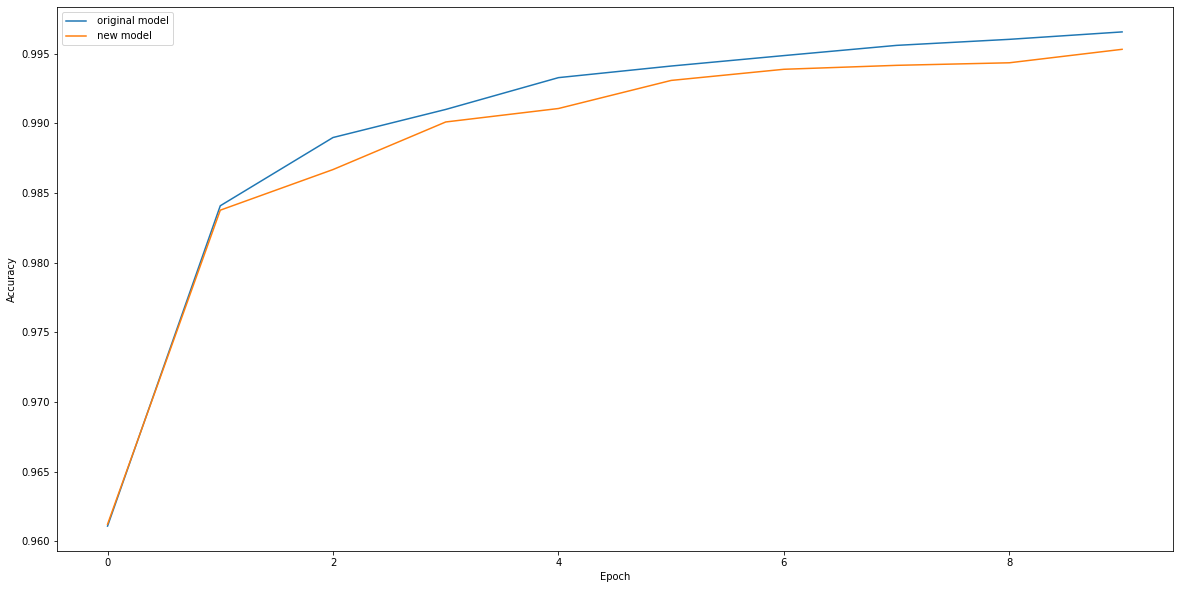

                                                                Figure 8: Accuracy with different model


In [ ]:
plt.plot(original.history['accuracy'], label=' original model')
plt.plot(history5.history['accuracy'], label=' new model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('                                                                Figure 8: Accuracy with different model')

In Figure 8, the accuracy of new model is lower than original model. The choice of activation function can have a significant impact on the performance of a neural network. While LeakyReLU can sometimes help prevent the vanishing gradient problem, it may not be the best choice for all types of problems or architectures. It's possible that the specific characteristics of the problem and the architecture of the network in my case did not benefit from the use of LeakyReLU.

Next,I will change the pool_size in MaxPooling2D.

In [ ]:
modelCNN_3 = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'), #A 2D convolutional layer with 32 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.Conv2D(64, 3, activation='relu'),#A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.MaxPooling2D(pool_size=5),# A max pooling layer with a pool size of 2x2.
    tf.keras.layers.Dropout(0.25), #A dropout layer that randomly sets 25% of the input units to 0 at each update during training.
    tf.keras.layers.Flatten(),#A flatten layer that flattens the output of the previous layer into a 1D tensor.
    tf.keras.layers.Dense(N1*N2, activation='relu'), #A dense layer with N1*N2 neurons and a ReLU activation function.
    tf.keras.layers.Dropout(0.5),#Another dropout layer that randomly sets 50% of the input units to 0 at each update during training.
    tf.keras.layers.Dense(10, activation='softmax') #A dense layer with 10 neurons and a softmax activation function.
])
modelCNN_3.summary() # Display the structure

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_47 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 flatten_23 (Flatten)        (None, 1024)              0         
                                                                 
 dense_46 (Dense)            (None, 784)               803600    
                                                     

In [ ]:
modelCNN_3.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
NUMBER_OF_EPOCHS = 10
history6 = modelCNN_3.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1622 - accuracy: 0.9496
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0639 - accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0500 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0439 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0377 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [ ]:
print('Validation')
prediction_on_test = modelCNN_3.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN_3.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 3ms/step
Test: 0.011314324421147387
1875/1875 [==============================] - 4s 2ms/step
Train: 0.003291798998010427


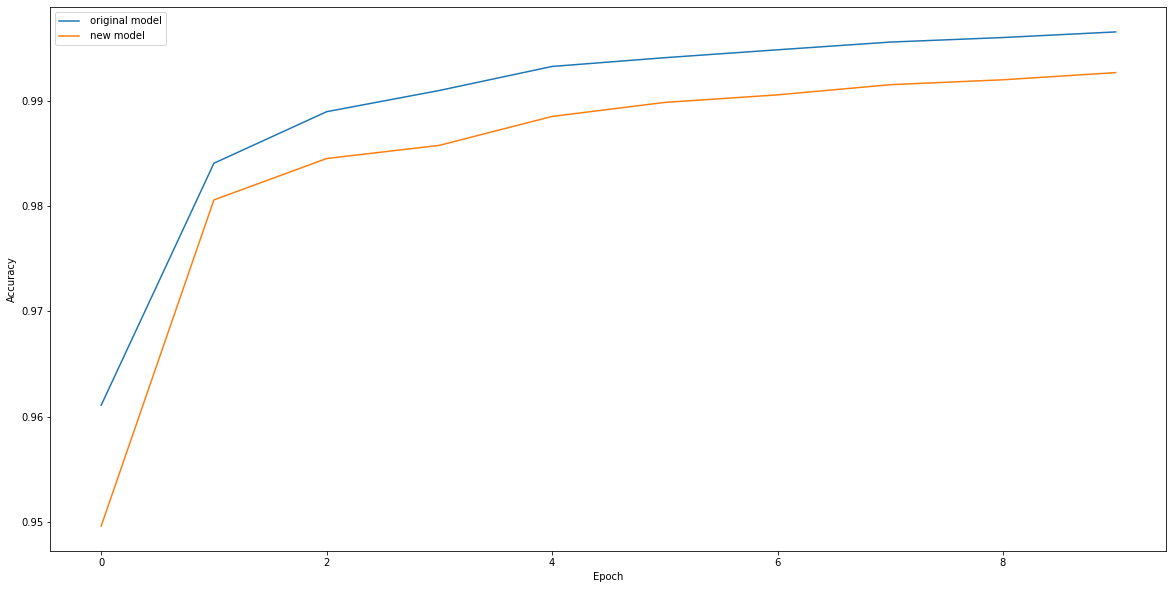

                                                                Figure 9: Accuracy with different model


In [ ]:
plt.plot(original.history['accuracy'], label=' original model')
plt.plot(history6.history['accuracy'], label=' new model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('                                                                Figure 9: Accuracy with different model')

In Figure 9, the accuracy of new model is lower than original model.

Changing the pool_size parameter of tf.keras.layers.MaxPooling2D from 2 to 5 will result in a larger pooling window. This means that the size of the output feature map will be smaller, which could lead to a loss of information.

In addition, a larger pooling window may increase the amount of information loss during the downsampling process, which could lead to a decrease in accuracy.

Next, chang the activation as sigmoid in dense layer.

In [ ]:
modelCNN_4 = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'), #A 2D convolutional layer with 32 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.Conv2D(64, 3, activation='relu'),#A 2D convolutional layer with 64 filters, each with a kernel size of 3x3 and a ReLU activation function.
    tf.keras.layers.MaxPooling2D(pool_size=5),# A max pooling layer with a pool size of 2x2.
    tf.keras.layers.Dropout(0.25), #A dropout layer that randomly sets 25% of the input units to 0 at each update during training.
    tf.keras.layers.Flatten(),#A flatten layer that flattens the output of the previous layer into a 1D tensor.
    tf.keras.layers.Dense(N1*N2, activation='relu'), #A dense layer with N1*N2 neurons and a ReLU activation function.
    tf.keras.layers.Dropout(0.5),#Another dropout layer that randomly sets 50% of the input units to 0 at each update during training.
    tf.keras.layers.Dense(10, activation='sigmoid') #A dense layer with 10 neurons and a softmax activation function.
])
modelCNN_4.summary() # Display the structure

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_51 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 flatten_25 (Flatten)        (None, 1024)              0         
                                                                 
 dense_50 (Dense)            (None, 784)               803600    
                                                     

In [ ]:
modelCNN_4.compile( # allocate loss function, optimizer, and metrics to monitor during training and testing.
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
NUMBER_OF_EPOCHS = 10
history7 = modelCNN_4.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1584 - accuracy: 0.9512
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0663 - accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0507 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

In [ ]:
print('Validation')
prediction_on_test = modelCNN_4.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN_4.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
313/313 [==============================] - 1s 2ms/step
Test: 0.17756545643228341
1875/1875 [==============================] - 4s 2ms/step
Train: 0.16042418128872518


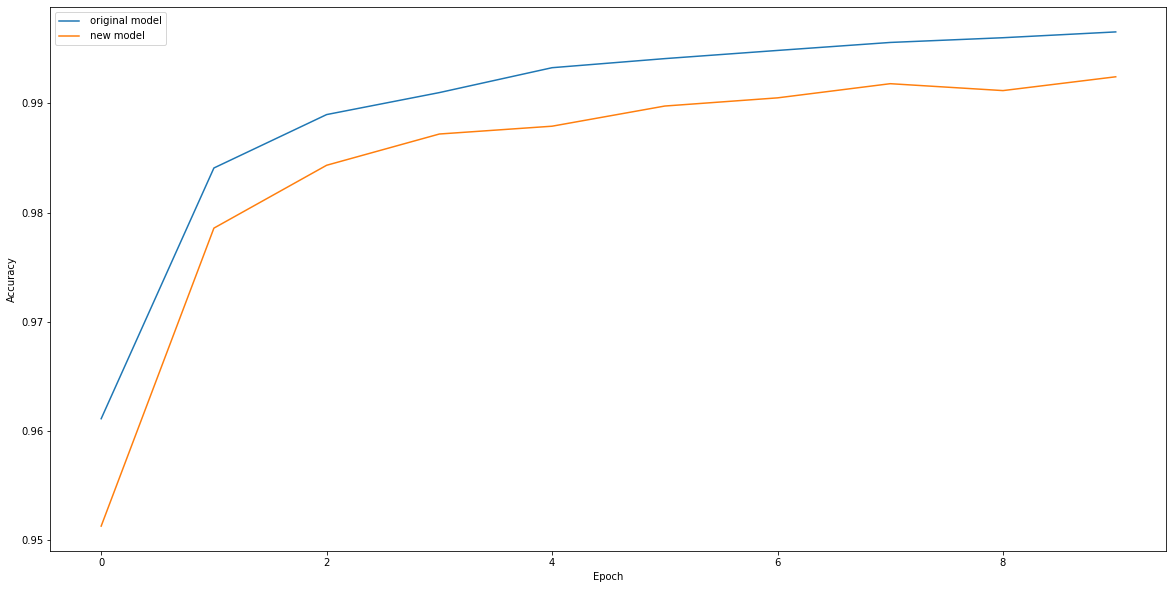

                                                                Figure 10: Accuracy with different model


In [ ]:
plt.plot(original.history['accuracy'], label=' original model')
plt.plot(history7.history['accuracy'], label=' new model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('                                                                Figure 10: Accuracy with different model')

In Figure 10, the accuracy of new model is lower than original model.

Changing the activation function of the last dense layer from 'softmax' to 'sigmoid' will change the output range of the model from probabilities for each class to a continuous range between 0 and 1 for a single output value. In this example, the MSE of train set almost equal to test set, it is not appropriate since we have multiple classes to predict.

# Conclusion


In Part 1, we explored digital image processing, including how to read an image from a URL and display it, Image Contours and Histograms, Grayscale, Transform and Histogram Equalization, Fourier Transform of Gray Images 

In part 2, we used Convolutional Neural Network to classify MNIST  and tried to change the model.

# References

Diegoinacio. (2022, September 7). Computer-vision-notebooks/mnist_classification.ipynb at master · Diegoinacio/Computer-vision-notebooks. GitHub. Retrieved March 18, 2023, from https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Experiments/MNIST_classification.ipynb 



xn2333-zz. (2019, July 11). OpenCV/seminar_image_processing_in_python.ipynb at master · XN2333-ZZ/opencv. GitHub. Retrieved March 18, 2023, from https://github.com/xn2333-zz/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb 

In [ ]:
#%%shell
#jupyter nbconvert --to html /content/223.ipynb